In [50]:
!pip install --upgrade pip

### Download necessary Libraries

In [ ]:

!pip install yfinance pandas numpy matplotlib

### import the libraries

In [ ]:

import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:

class TradingBot:
    def __init__(self, symbol, start_date, end_date):
        self.symbol = symbol
        self.start_date = start_date
        self.end_date = end_date
        self.data = None
        self.budget = 5000
        self.balance = 5000
        self.shares = 0
        self.position_open = False
        self.trade_log = []

    # Data Acquisition 
    def download_data(self):
        print(f"📥 Downloading data for {self.symbol}...")
        self.data = yf.download(self.symbol, start=self.start_date, end=self.end_date)
        
        # if the collumn is multi index, flatten it
        if isinstance(self.data.columns, pd.MultiIndex):
            self.data.columns = self.data.columns.get_level_values(0)
            
        print("✅ Data Downloaded.")

    # Data Cleanup
    def clean_data(self):
        self.data = self.data.drop_duplicates()
        self.data = self.data.ffill()
        print("🧹 Data Cleaned.")

    # Analytical Insights
    def calculate_indicators(self):
        self.data['SMA50'] = self.data['Close'].rolling(window=50).mean()
        self.data['SMA200'] = self.data['Close'].rolling(window=200).mean()
        print("📈 Indicators Calculated.")

    # Investment Strategy
    def run_strategy(self):
        print("\n🚀 Starting Trading Simulation...")
        
        for i in range(len(self.data)):
            date = self.data.index[i]
            row = self.data.iloc[i]
            
           
            price = float(row['Close'])
            sma50 = row['SMA50']
            sma200 = row['SMA200']

            
            if isinstance(sma50, pd.Series): sma50 = sma50.item()
            if isinstance(sma200, pd.Series): sma200 = sma200.item()

            if pd.isna(sma50) or pd.isna(sma200):
                continue

            # Golden Cross
            if sma50 > sma200 and not self.position_open:
                self.shares = math.floor(self.balance / price)
                cost = self.shares * price
                self.balance -= cost
                self.position_open = True
                print(f"🟢 BUY  at {date.date()}: Price ${price:.2f} | Shares: {self.shares}")

            # Death Cross
            elif sma50 < sma200 and self.position_open:
                revenue = self.shares * price
                self.balance += revenue
                print(f"🔴 SELL at {date.date()}: Price ${price:.2f} | Profit/Loss Update: ${self.balance - 5000:.2f}")
                self.shares = 0
                self.position_open = False

            # Force Close at End
            if i == len(self.data) - 1 and self.position_open:
                revenue = self.shares * price
                self.balance += revenue
                self.shares = 0
                self.position_open = False
                print(f"⚠️ FORCE SELL at End ({date.date()}): Price ${price:.2f}")

    def show_performance(self):
        profit = self.balance - 5000
        print("\n" + "="*30)
        print(f"🏁 Final Balance: ${self.balance:.2f}")
        print(f"💰 Total Profit/Loss: ${profit:.2f}")
        print("="*30)

### Create Object

In [ ]:

alex_bot = TradingBot("AAPL", "2018-01-01", "2023-12-31")

### Data Acquisition & Cleanup

In [ ]:

alex_bot.download_data()
alex_bot.clean_data()

[*********************100%***********************]  1 of 1 completed

📥 Downloading data for AAPL...
✅ Data Downloaded.
🧹 Data Cleaned.


### Analytical Insights

In [ ]:

alex_bot.calculate_indicators()
print(alex_bot.data[['Close', 'SMA50', 'SMA200']].tail())

📈 Indicators Calculated.
Price            Close       SMA50      SMA200
Date                                          
2023-12-22  191.788742  183.572862  176.609050
2023-12-26  191.243912  183.858867  176.832688
2023-12-27  191.342972  184.149426  177.047102
2023-12-28  191.768951  184.479570  177.253188
2023-12-29  190.728775  184.814831  177.452100


In [ ]:

alex_bot.run_strategy()
alex_bot.show_performance()


🚀 Starting Trading Simulation...
🟢 BUY  at 2018-10-16: Price $52.62 | Shares: 95
🔴 SELL at 2018-12-21: Price $35.83 | Profit/Loss Update: $-1595.38
🟢 BUY  at 2019-05-06: Price $49.77 | Shares: 68
🔴 SELL at 2022-06-03: Price $142.78 | Profit/Loss Update: $4729.57
🟢 BUY  at 2022-09-26: Price $148.28 | Shares: 65
🔴 SELL at 2022-10-07: Price $137.78 | Profit/Loss Update: $4046.82
🟢 BUY  at 2023-03-22: Price $155.72 | Shares: 58
⚠️ FORCE SELL at End (2023-12-29): Price $190.73

🏁 Final Balance: $11077.23
💰 Total Profit/Loss: $6077.23


### Visualaization

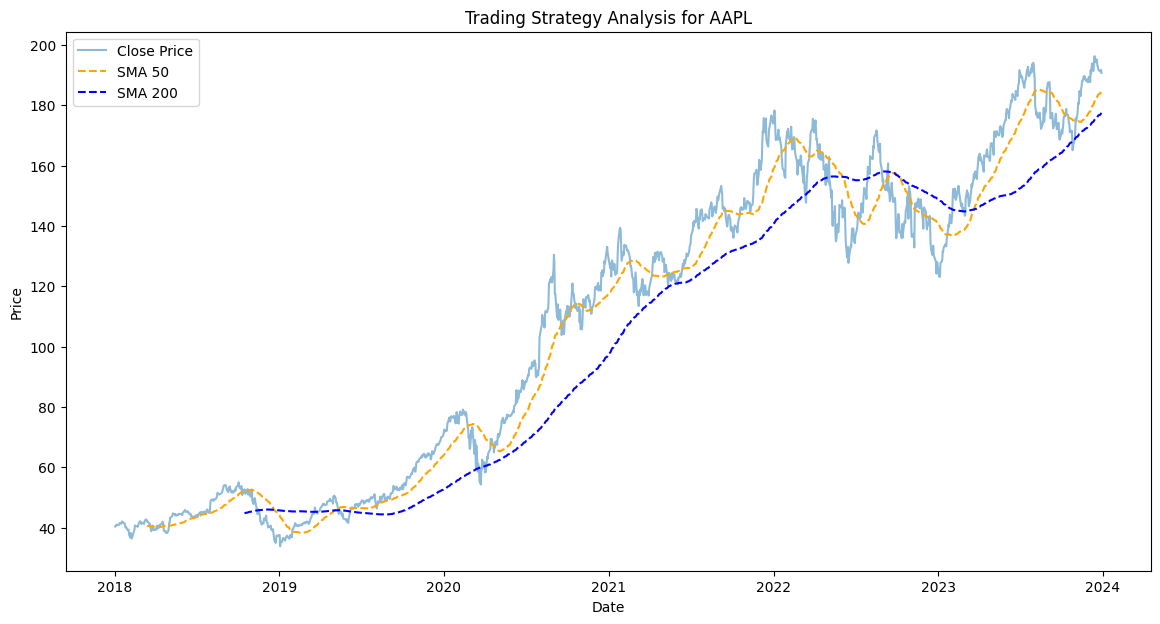

In [15]:
# Cell 8
plt.figure(figsize=(14, 7))
plt.plot(alex_bot.data['Close'], label='Close Price', alpha=0.5)
plt.plot(alex_bot.data['SMA50'], label='SMA 50', color='orange', linestyle='--')
plt.plot(alex_bot.data['SMA200'], label='SMA 200', color='blue', linestyle='--')

plt.title(f'Trading Strategy Analysis for {alex_bot.symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()